Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-201.557,-211.189,2.78337e-59
2,140.151,4.0,-198.926,-208.543,3.92241e-58
3,140.302,4.0,-196.323,-205.926,5.37245e-57
4,140.452,4.0,-193.748,-203.337,7.15204e-56
5,140.603,4.0,-191.202,-200.777,9.25391e-55
6,140.754,4.0,-188.685,-198.245,1.16375e-53
7,140.905,4.0,-186.195,-195.742,1.42242e-52
8,141.055,4.0,-183.734,-193.267,1.68981e-51
9,141.206,4.0,-181.302,-190.821,1.95112e-50


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,154.623,9.14573,-68.8579,-77.3677,0.365084
2,154.623,10.191,-69.813,-78.3228,0.140477
3,151.307,8.1005,-69.2235,-77.9409,0.205818
4,153.869,6.41206,-68.1072,-76.6617,0.739633
5,155.829,6.33166,-68.9681,-77.4092,0.350247
6,152.362,7.61809,-68.3704,-77.0187,0.517554
7,155.377,8.98492,-68.907,-77.3735,0.362996
8,152.814,6.73367,-68.239,-76.8586,0.607467
9,152.06,7.8593,-68.6053,-77.2731,0.401329


### Snippet 4.23

Density of sigma

┌ Warning: seriestype density has been moved to StatsPlots.  To use: `Pkg.add("StatsPlots"); using StatsPlots`
└ @ Plots /Users/rob/.julia/packages/Plots/UQI78/src/args.jl:1054
┌ Warning: seriestype density has been moved to StatsPlots.  To use: `Pkg.add("StatsPlots"); using StatsPlots`
└ @ Plots /Users/rob/.julia/packages/Plots/UQI78/src/args.jl:1054


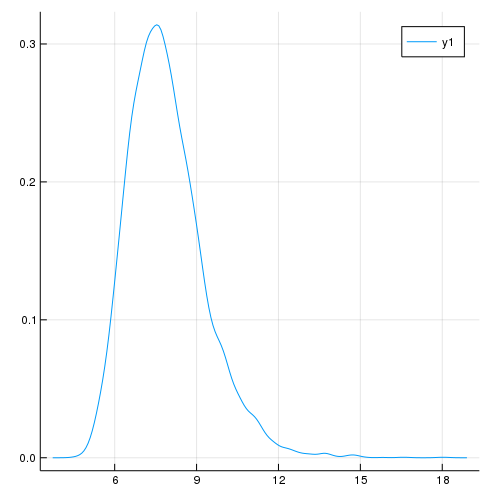

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*